### What is PyTorch?

PyTorch is a Python library used with two purposes:
  * represents a replacement for the NumPy library, which can be used by the computational power of components such as GPUs
  * contains the implementation of an automatic derivation system, useful for training neural networks

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Tensors

Tensors are a special data structure, similar to vectors and matrices. Tensors are used in PyTorch to store model input and output, but also model parameters.

Tensors are very similar to NumPy arrays, with the difference that they can be processed by GPU or other types of specialized hardware.

In [ ]:
import torch
import numpy as np
import string

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

from tqdm import trange

### Tensors Initialization

**Using Python lists**

In [ ]:
data = [[1, 2], [3, 4]]
t_from_list = torch.tensor(data)
print(t_from_list)

tensor([[1, 2],
        [3, 4]])


**Using NumPy arrays**

In [ ]:
np_array = np.array(data)
t_from_np = torch.from_numpy(np_array)
print(t_from_np)

tensor([[1, 2],
        [3, 4]])


**Using another tensor**

The new tensor retains the properties (shape + data type) of the original tensor, if not explicitly specified otherwise.

In [ ]:
t_ones = torch.ones_like(t_from_list)  # same properties as t_from_list
print(f"Tensor plin de 1:\n{t_ones}\n")

t_rand = torch.rand_like(t_from_list, dtype=torch.float)  # overrids the datatype
print(f"Tensor random:\n{t_rand}\n")

Tensor plin de 1:
tensor([[1, 1],
        [1, 1]])

Tensor random:
tensor([[0.0531, 0.8015],
        [0.2837, 0.5461]])



**Using random and costant values**

In [ ]:
shape = (2, 3, 2)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random tensor:\n{rand_tensor}\n")
print(f"Ones tensor:\n{ones_tensor}\n")
print(f"Zeros tensor:\n{zeros_tensor}\n")

Random tensor:
tensor([[[0.9149, 0.2065],
         [0.5955, 0.9774],
         [0.2177, 0.4599]],

        [[0.6134, 0.1283],
         [0.4947, 0.1102],
         [0.8539, 0.6437]]])

Ones tensor:
tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

Zeros tensor:
tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]])



### Tensor properties

In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape: {tensor.shape}")
print(f"Tip de date: {tensor.dtype}")
print(f"Device: {tensor.device}")

Shape: torch.Size([3, 4])
Tip de date: torch.float32
Device: cpu


### Tensors operations

You can find [here](https://pytorch.org/docs/stable/torch.html) an exhaustive list of operations (transpositions, indexing, slicing, concatenations, mathematical operations, etc.)

All these operations can be done faster with the help of a GPU.

In [ ]:
# moving the tensor to the GPU if we have one available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
    print(f"The tensor is now stored pe: {tensor.device}")

The tensor is now stored pe: cuda:0


**Indexing and slicing (similar to NumPy)**

In [ ]:
tensor = torch.ones(4, 4)
print(tensor)
tensor[:, 1] = 0
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Concatenare**

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Tensor multiplication**

In [ ]:
# element-wise multiplication
tensor = torch.tensor([[0, 2], [2, 0], [2, 2]])
print(f"tensor.mul(tensor)\n{tensor.mul(tensor)}\n")
print(f"tensor * tensor\n{tensor* tensor}\n")

tensor.mul(tensor)
tensor([[0, 4],
        [4, 0],
        [4, 4]])

tensor * tensor
tensor([[0, 4],
        [4, 0],
        [4, 4]])



In [ ]:
# matrix multiplication
# multipling the matrix with its transpose (tensor.T)
print(f"tensor.matmul(tensor.T)\n{tensor.matmul(tensor.T)}\n")
print(f"tensor @ tensor.T\n{tensor @ tensor.T}\n")

tensor.matmul(tensor.T)
tensor([[4, 0, 4],
        [0, 4, 4],
        [4, 4, 8]])

tensor @ tensor.T
tensor([[4, 0, 4],
        [0, 4, 4],
        [4, 4, 8]])



**In-place operations**

The operations that have `_` as a suffix modify the tensor for which they were called. Example: `x.copy_(y)` or `x.t_()` modifies `x`.

These methods save memory but bring problems when it comes to the automatic computing of the derivatives of the performed operations (that's why their use is NOT recommended).

In [ ]:
print(tensor, "\n")
tensor.add(5)
print(tensor)

tensor([[0, 2],
        [2, 0],
        [2, 2]]) 

tensor([[0, 2],
        [2, 0],
        [2, 2]])


### Link with NumPy

A tensor stored on the CPU and a NumPy array can share the same memory in the program, so changes on one are reflected on the other.

In [ ]:
# tensor -> np array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
# np array -> tensor
n = np.ones(5)
t = torch.from_numpy(n)
print(f"t: {t}")
print(f"n: {n}")

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## autograd torch

`torch.autograd` is the automatic derivation engine used by PyTorch to train neural networks.

### Neural networks

Neural networks (NN - Neural Networks) are a collection of chained functions that are applied to some input data. These functions are defined by parameters (weights and biases), which in PyTorch are stored through tensors.

The training of a neural network is done in two steps:
 - **forward propagation**: the network tries to predict the correct output based on the input data. Pass the input data through the string of functions (the input of the next function is the output of the current function in the list)
 - **backward propagation**: in this step the network parameters are adjusted proportionally with the error produced by the prediction made in the forward step. This is achieved by going through the list of functions in reverse, starting from the output, computing at each step the derivative of the error in relation to the parameters of the functions (we also call these derivatives gradients), and the parameters are optimized using gradient descent.

### Implementation in PyTorch

We will try a single training step. We load a pre-trained `resnet18` model used for image classification into $1000$ classes. We create a random tensor for a single image of $64 \times 64$ pixels with $3$ color channels. We initialize the label of this image with a random tensor of size $(1, 1000)$.

In [ ]:
import torchvision

# we will consider this model as a black-box for the moment
# which receives as input tensors of the form (batch_size, 3, 64, 64)
# and returns for each image in the batch the distribution of labels for that image
# the form of the output is therefore: (batch_size, 1000)
model = torchvision.models.resnet18(pretrained=True)

data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
# pasul forward
prediction = model(data)
prediction

tensor([[-6.3009e-01, -3.7614e-01, -5.7177e-01, -1.7536e+00, -7.4531e-01,
         -1.6678e-01, -4.6507e-01,  2.5135e-01,  3.3486e-01, -8.0390e-01,
         -1.1405e+00, -9.7428e-01, -4.7669e-01, -1.1217e+00, -1.2470e+00,
         -9.7035e-01, -9.5477e-01, -2.7423e-01, -6.3479e-01, -8.4609e-01,
         -1.6516e+00, -6.7903e-01, -1.6396e+00,  6.9240e-02, -9.4930e-01,
         -1.3002e+00, -1.0129e+00, -1.4057e+00, -8.6731e-01, -5.1776e-01,
         -9.8138e-01, -8.8535e-01, -5.7461e-01, -5.1450e-01, -2.9502e-01,
         -4.5308e-01,  7.2021e-01, -6.7221e-01, -4.6597e-01, -3.2766e-01,
         -8.4400e-01, -1.0359e+00, -1.0239e+00, -3.3517e-01, -8.5860e-01,
         -3.8299e-01, -9.4966e-01, -4.6048e-01, -1.2705e+00, -1.0223e+00,
         -7.2406e-01,  5.9482e-01, -5.2798e-01, -4.8628e-01, -1.4779e-01,
         -1.1445e+00, -1.7438e-01, -1.6838e+00, -3.2421e-01, -4.4255e-01,
          6.2887e-01,  8.3185e-03, -3.0732e-01,  4.3848e-01, -5.1793e-01,
         -3.1276e-01, -1.9648e-01, -2.

We use the model prediction and the correct label to compute the error (`loss`). The next step is the backpropagation of this error through the network. This is done when we call the `.backword()` method for the tensor containing the error. The `autograd` engine computes and stores the gradients for model parameter rotation in the `.grad` attribute of these parameters.

In [ ]:
loss = (prediction - labels).sum()
loss.backward()  # backward step

Then, we load a parameter optimization algorithm (optimizer), in the present case [SGD](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) (Stochastic Gradient Descent) with a learning rate of $0.01$ and momentum $0.9$.

First, we record all the parameters of the model in the optimizer.

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

Eventyually, we call `.step()` on the optimizer to initiate the gradient descent algorithm. The optimizer thus adjusts each parameter of the model based on the gradients computed at the backward step.

In [ ]:
optim.step()  # gradient descent

[Other](https://pytorch.org/docs/stable/optim.html) useful optimizers.

### Automatic derivation in Autograd

In the following examples we will see how `autograd` collects and computes the gradients. We create two tensors with the `requires_grad` attribute set to `True`. This signals to the autograd engine that all operations involving these tensors must be tracked.

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

We now create a tensor that holds an operation between `a` and `b`.
$$Q = 3a^3-b^2$$

In [ ]:
Q = 3 * a**3 - b**2
Q

tensor([-12.,  65.], grad_fn=<SubBackward0>)

If we assume that $a$ and $b$ would be the parameters of a network and $Q$ would be the error, during training we are interested in the derivative of the error in relation to each individual parameter:

$$\frac{\partial Q}{\partial a} = 9a^2$$

$$\frac{\partial Q}{\partial b} = -2b$$

When we call `.backward()` for `Q`, `autograd` computes these gradients and saves them in the `.grad` attribute of the corresponding tensors.

In [ ]:
Q.backward()

RuntimeError: ignored

The issue is that `Q` is not a scalar, and the `autograd` engine can only optimize scalar values. For optimizing `Q` we can aggregate $Q$ in a scalar value and apply `backward` without specifying the initial gradient: `Q.sum().backward()`.





In [ ]:
# we need to redo the forward pass
Q = 3 * a**3 - b**2

# aggregating Q in a scalar
loss = Q.sum()
loss.backward()

Alternatively, we can explicitly pass a `gradient` argument to the `Q.backward()` function, since `Q` is a vector `.gradient` is a tensor of the same form as `Q` and represents the derivative of $Q$ with respect to itself:

$$\frac{\partial Q}{\partial Q} = 1$$

In [ ]:
# since the vectors a and b were updated, we need to reinitialize them
# to perform this new version and redo the forward pass
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3 * a**3 - b**2

In [ ]:
# Q is a vector, so we need to specify the derivative with itself
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

The gradients of a and b are stored in `a.grad` si `b.grad`.

In [ ]:
print(f"9a^2 = {9 * a ** 2}")
print(f"dQ/da = {a.grad}\n")
print(f"-2b = {-2 * b}")
print(f"dQ/db = {b.grad}")

9a^2 = tensor([36., 81.], grad_fn=<MulBackward0>)
dQ/da = tensor([36., 81.])

-2b = tensor([-12.,  -8.], grad_fn=<MulBackward0>)
dQ/db = tensor([-12.,  -8.])


### Computation graph

Conceptually, `autograd` retains the tensors and all the operations performed on them, together with the intermediate results, in the form of a directed acyclic graph (DAG - Directed Acyclic Graph) in which the nodes are objects of type [Function](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function). In this DAG, the leaves are the input tensors, and the root/roots are the output tensors. Traversing paths in this graph from roots to leaves.

The DAG representation for the earlier computation of `Q` is this:

$$Q = 3a^3-b^2$$

![](https://pytorch.org/tutorials/_images/dag_autograd.png)






The gradients can be automatically computed using the "chain rule":

$$\frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx}$$

In the forward step, `autograd`:
 * computes the result of the current operation in a tensor
 * maintains the derived function of this operation in the DAG, in the `.grad_fn` attribute of the resulting tensor

The backward step starts when the `.backward()` method is called for a root in the DAG. Then, `autograd`:
 * computes each gradient using `.grad_fn`
 * accumulates the gradient in the `.grad` attribute of the respective tensor
 * using the "chain rule" propagate the gradients up to the leaves

In [ ]:
fn = Q.grad_fn
print(fn)
print(fn.next_functions)

((<MulBackward0 object at 0x7fd4bc6e8550>, 0), (<PowBackward0 object at 0x7fd4bc6e8d50>, 0))


### Exclusion from DAG

`autograd` tracks the operations performed on all tensors that have `requires_grad=True`. For tensors that do not need gradients, setting this attribute to `False` excludes them from the DAG.

The output tensor of an operation will have `requires_grad=True` if at least one input tensor also has `requires_grad=True`.

In [ ]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"a.requires_grad: {a.requires_grad}")
b = x + z
print(f"b.requires_grad: {b.requires_grad}")

a.requires_grad: False
b.requires_grad: True


## Steps to train a model

We will illustrate the steps to follow if we want to define and train a model for a simple classification problem.

First we will define our data, a very small set of data classified into 3 classes.

In [ ]:
dummy_data = {
    "vectors": [
        torch.tensor([0., 0., 0., 0., 0., 0., 2., 3., 4.]),
        torch.tensor([0., 0., 0., 0., 0., 0., 4., 2., 5.]),
        torch.tensor([0., 0., 0., 0., 0., 0., 7., 9., 1.]),
        torch.tensor([0., 0., 0., 4., 5., 2., 0., 0., 0.]),
        torch.tensor([0., 0., 0., 2., 4., 6., 0., 0., 0.]),
        torch.tensor([0., 0., 0., 2., 3., 5., 0., 0., 0.]),
        torch.tensor([2., 9., 6., 0., 0., 0., 0., 0., 0.]),
        torch.tensor([6., 5., 4., 0., 0., 0., 0., 0., 0.]),
        torch.tensor([7., 7., 4., 0., 0., 0., 0., 0., 0.]),
    ],
    "labels": [0, 0, 0, 1, 1, 1, 2, 2, 2],
}

### PyTorch Dataset

We will load our dataset into an object of the [Dataset](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset) class.

In [ ]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        super().__init__()
        self.data = data

    # the following two methods must be implemented
    def __getitem__(self, k):
        """Returns the k-th element of the dataset""""
        return (
            self.data["vectors"][k],
            self.data["labels"][k]
        )

    def __len__(self):
        """Return the length of the dataset"""
        return len(self.data["labels"])

In [ ]:
dummy_dataset = MyDataset(dummy_data)
len(dummy_dataset)

9

### PyTorch DataLoader

During training we want to go through the examples in the dataset and pass them through our network. In practice, several examples are passed through the network before calling the backward step. Such a group is called a batch.

The DataLoader is an iterator built starting from the dataset, which groups several examples in batches.

In [ ]:
dummy_dataloader = torch.utils.data.DataLoader(dummy_dataset, batch_size=2, shuffle=True)

In [ ]:
next(iter(dummy_dataloader))

[tensor([[0., 0., 0., 0., 0., 0., 4., 2., 5.],
         [0., 0., 0., 2., 3., 5., 0., 0., 0.]]), tensor([0, 1])]

### Model definition

As I said earlier, a model is a chain of functions (or layers). To define a model we implement a class that inherits the `torch.nn.Module` class and implement its constructor in which we define the layers and the `forward` method in which we describe how these layers are applied.

We will implement a very simple model: a single linear layer (feed-forward) that receives a vector of size $9$ (the number of features of our data) and returns an output of size $3$ (the number of classes in our problem).

A linear layer is an operation of the form $y = A \cdot x + b$ (where the matrix $A$ represents the weights of the layer, and the vector $b$, the bias).

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(in_features=9, out_features=3)

    def forward(self, x):
        output = self.linear(x)  # applying the Linear layer
        return output

### Error computing

For a vector of size $9$, the model returns one of size $3$. How can we interpret this vector to get the predictions?

For example, we could determine the position of the maximum value and say that this is the class predicted by the model

In [ ]:
t = torch.tensor([3., 4., 1.])
print("Maximum:\t\t", t.max(0)[0])
print("Maximum position:\t", t.max(0)[1])

Maximum:		 tensor(4.)
Maximum position:	 tensor(1)


However, a better option would be to transform the tensor values into a probability distribution (with what probability does the model assign class $i$ to the example?).

A function that computes such a distribution starting from some tensor is the function [*softmax*](https://pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html).

In [ ]:
print(torch.nn.functional.softmax(t, dim=0))

tensor([0.2595, 0.7054, 0.0351])


Using the distribution generated by the model and the true labels we can now compute the error. An error function often used for classification is [*cross-entropy*](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

# we assume that this is the output of the model for a batch of 2 examples
output = torch.tensor([
     [3., 7., 4.],
     [4., 2., 3.],
])

# and we assume that these would be the real labels
true_labels = torch.tensor([1, 1])

print("Predicted labels:", output.max(1)[1])

# the loss function automatically applies softmax over the output of the model
# the result is a scalar corresponding to the average error for all examples in the batch
print("loss: ", loss_fn(output, true_labels))

Predicted labels: tensor([1, 0])
loss:  tensor(1.2367)


### Training epoch

A training epoch represents going through the dataset (once) and updating the model parameters based on the predictions made.

In [ ]:
# wonder if we have a GPU available
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# initialize the model and move it to the appropriate device
model = Model().to(DEVICE)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# we set the model in training mode
model.train()

# we go through the batches using the dataloader
for (vectors, labels) in dummy_dataloader:
     # move the vectors and labels to the corresponding device
     vectors = vectors.to(DEVICE)
     labels = labels.to(DEVICE)

     # reset the remaining gradients from the previous batch
     optimizer.zero_grad()

     # we pass the vectors (batch_size x 9) from the batch through the model (forward step)
     output = model(vectors) # shape: batch_size x 3

     # we compute the loss
     loss = loss_fn(output, labels)

     # backward step
     loss.backward()

     # we update the parameters of the model using the optimizer
     optimizer.step()

Now we can evaluate the model

In [ ]:
# we turn the model into the evaluation mode
model.eval()

true_labels = []
predicted_labels = []
mean_loss = 0

with torch.no_grad():
  for (vectors, labels) in dummy_dataloader:
     vectors = vectors.to(DEVICE)
     labels = labels.to(DEVICE)

     output = model(vectors)
     loss = loss_fn(output, labels)

     mean_loss += loss.item()
     true_labels.extend(labels.tolist())
     predicted_labels.extend(output.max(1)[1].tolist())

mean_loss /= len(dummy_dataloader)

In [ ]:
import sklearn.metrics as metrics

print("Accuracy:", metrics.accuracy_score(true_labels, predicted_labels))
print("Mean loss:", mean_loss)

Accuracy: 1.0
Mean loss: 0.2556738078594208


#### Important!!!

Neural networks can quite easily obtain very good performance on the data with which they were trained, but without generalizing (on new data, they obtain very poor performance). We call this case **overfit**.

In order to clearly establish the performance of the model in practice, the data is divided into 3 categories:
 - train: the data on which the model is trained at each epoch
 - validation: at the end of each epoch we evaluate the performance of the model on these data (unseen during training)
 - test: once we have trained the best model (selected according to the validation data) the final evaluation is made on this data (also unseen during training)

The validation data is used to monitor the performance (loss, accuracy, etc.) of the model at the end of each epoch. We can select, for example, the parameters of the model from the end of the era with the best performance. Also, if we notice that the error on the validation data stagnates or increases while the error on the train data continues to decrease, we can conclude that the model has started to **overfit** the train data.

### Chaining several layers

For example, we can define several feed-forward (linear) layers and pass the input successively through them.

In [ ]:
t_input = torch.tensor([[1., 2., 3., 4., 5.]])  # the shape is always (batch_size, dim)

layer_1 = torch.nn.Linear(5, 8)
layer_2 = torch.nn.Linear(8, 4)
layer_3 = torch.nn.Linear(4, 7)

t_output = layer_1(t_input)
t_output = layer_2(t_output)
t_output = layer_3(t_output)

print("Input shape:", t_input.shape)
print("Output shape:", t_output.shape)

Input shape: torch.Size([1, 5])
Output shape: torch.Size([1, 7])


#### Activation functions

Activation functions (activation functions / non-linearities) are functions applied to the output of a linear layer. The reason why we need such functions is the fact that a layer transforms the input by applying an affine transformation ($A \cdot x + b$). Several chained affine transformations are equivalent to a single transformation (there is a `Linear(5, 7)` layer that would do the same transformation above).

Thus, by adding more intermediate layers, we do not really increase the complexity of the model. In the case above, without the cross-layer activation function, the model has the same complexity as if it had a single Linear layer, and is very likely to [underfitting](https://www.ibm.com/cloud/learn /underfitting). A model that is not complex enough for the task and fails to learn is an **underfit** model.

The activation functions are non-linear functions derivable at all points (possibly with the exception of a finite number of points). Common activation functions are [ReLU](https://pytorch.org/docs/1.11/generated/torch.nn.ReLU.html#torch.nn.ReLU) and [tanh](https://pytorch.org/ docs/1.11/generated/torch.nn.Tanh.html).

In [ ]:
# x.t @ W1 @ W2 @ w3 = x.t @ W4
t_input = torch.tensor([[1., 2., 3., 4., 5.]])  #  the shape is always (batch_size, dim)

layer_1 = torch.nn.Linear(5, 8)
layer_2 = torch.nn.Linear(8, 4)
layer_3 = torch.nn.Linear(4, 7)

t_output = layer_1(t_input)
t_output = torch.nn.functional.relu(t_output)
t_output = layer_2(t_output)
t_output = torch.nn.functional.relu(t_output)
t_output = layer_3(t_output)

print("Input shape:", t_input.shape)
print("Output shape:", t_output.shape)

Input shape: torch.Size([1, 5])
Output shape: torch.Size([1, 7])


We can use the `Sequential` layer to combine several layers into one

In [ ]:
t_input = torch.tensor([[1., 2., 3., 4., 5.]])  #  the shape is always (batch_size, dim)

seq = torch.nn.Sequential(
    torch.nn.Linear(5, 8),
    torch.nn.ReLU(),
    torch.nn.Linear(8, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4, 7),
)

t_output = seq(t_input)

print("Input shape:", t_input.shape)
print("Output shape:", t_output.shape)

Input shape: torch.Size([1, 5])
Output shape: torch.Size([1, 7])


### Dropout

The idea comes from Genetics: in reproduction, evolution is archieved using gene swapping. The genes must not be just good with combination with other genes, they need to be universally good.

Dropout is a regularization method of neural networks. It can help train more robust networks that can generalize better. The principle of operation is simple:
  - during training, each component of a vector passed through this layer is transformed into $0$ with probability $p$, and the rest of the components are scaled by $\frac{1}{1-p}$
  - for inference (evaluation), this layer does not affect the input in any way

If the scalling part was not performed for the surviving neurons, the activation values of the neurons that are "universally good" will be much higher than without dropout (their mean will be higher).

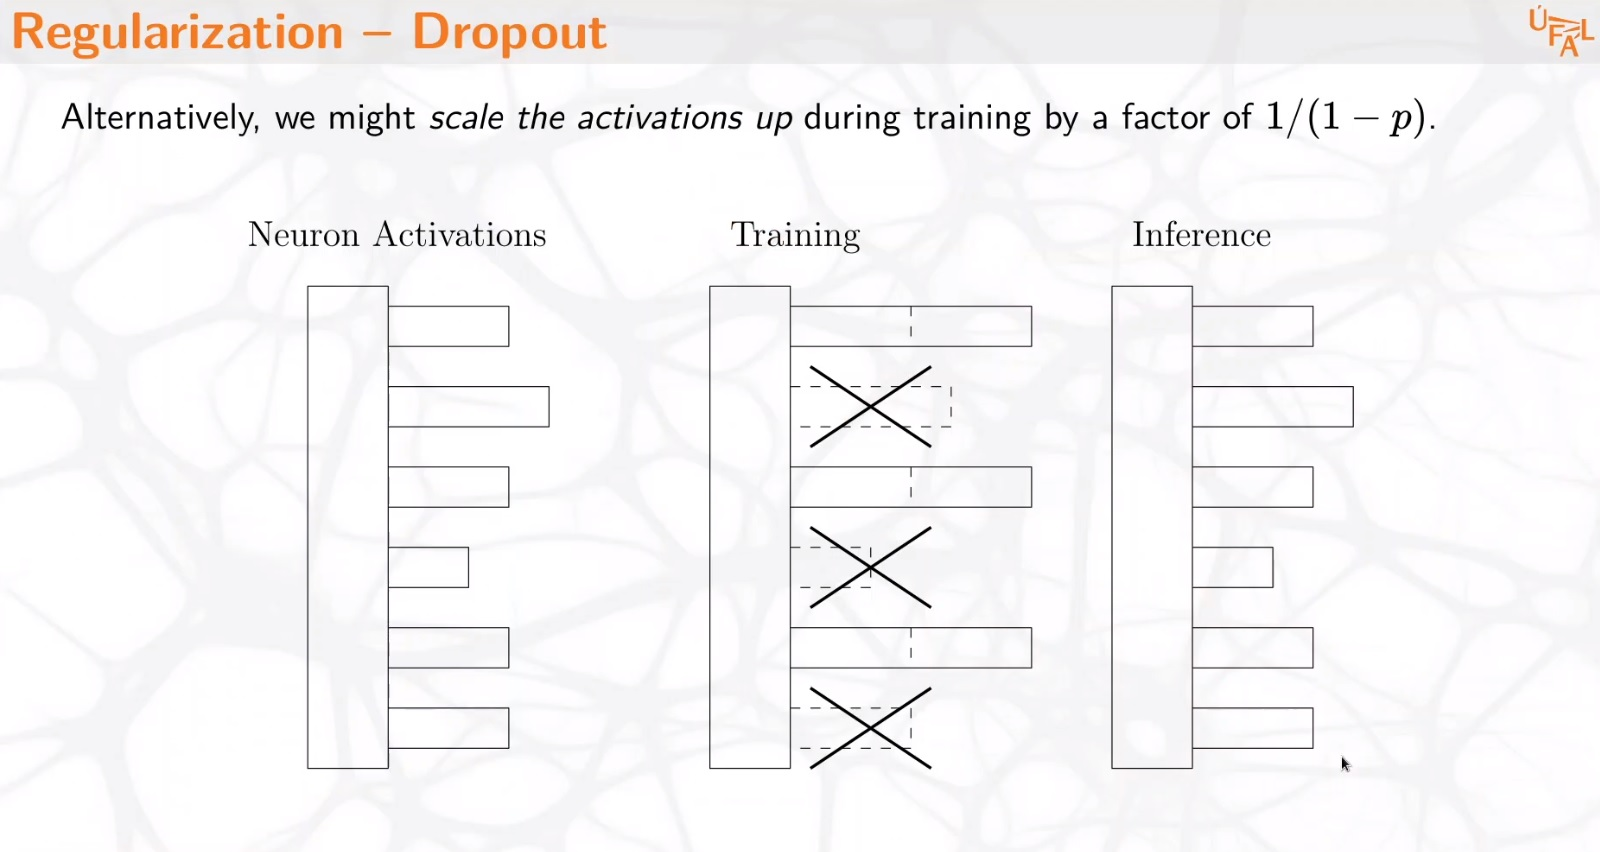

Since this layer behaves differently when training compared to evaluation, it is important to take care that the model is set in advance in the correct configuration (`model.train()` or `model.eval()`).

In [ ]:
t = torch.tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
dropout = torch.nn.Dropout(p=0.5, inplace=False)

print("Input:", t)
output = dropout(t)
print("Output:", output)
output = dropout(t)
print("Output:", output)

Input: tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
Output: tensor([0., 0., 6., 8., 0., 0., 0., 0., 0.])
Output: tensor([ 2.,  4.,  0.,  0.,  0.,  0.,  0., 16.,  0.])


In [ ]:
dropout.parameters()

[]

### Saving a model

In [ ]:
torch.save(model.state_dict(), "model.pt") # save model weights
model.load_state_dict(torch.load("model.pt")) # load the weights from the file

<All keys matched successfully>

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0655, -0.0775, -0.1262,  0.0646,  0.0856, -0.1404,  0.1631,  0.0528,
                       -0.1034],
                      [-0.0128, -0.0504, -0.1392,  0.2123,  0.0921,  0.1673, -0.2620, -0.0254,
                        0.0040],
                      [-0.1159,  0.2714,  0.0597,  0.0829, -0.1771, -0.2509,  0.2630, -0.3114,
                       -0.2286]], device='cuda:0')),
             ('linear.bias',
              tensor([-0.1651,  0.0423, -0.3156], device='cuda:0'))])

# Tasks

Implement a model which is given Romanian lowercased text (from [this dataset](https://github.com/dumitrescustefan/ronec)) and tries to uppercase appropriate letters. To load the dataset, use the following code which imports the data, and splits it into sequences of characters and labels using a sliding window. The following steps will guide you throught the process:

1. Divide the dataset into 80% train, 10% validation and 10% test. Create the three dataloaders corresponding to each split.

2. Define a model with at least 3 linear layers, the last of which has the output size equal to the number of classes. Apply an activation function of your choice after each linear layer (except the last one).

3. Define the loss function (cross-entropy) and an optimizer (SGD, Adam, etc.).

4. Train the model for multiple epochs on the train data. At the end of each epoch, evaluate the performance of the model on the validation data. Monitor at each epoch the average error and the accuracy for the predictions made on the training data and separately on the validation data, so that if you notice the *overfit* situation, you can stop the training.

5. Save the model with the best validation error, computed at the end of the respective epoch.

6. Plot the evolution of the train error and the validation error at the end of each epoch on the same graph. Plot in another graph the evolution of accuracy on the train and validation data.

7. Evaluate the model (error, accuracy, macro-f1, etc.) on the test data.

8. Try to add after each layer in the model (except the last one) dropout with a $p$ chosen by you. Analyze if the performance of a model trained in this way is better.

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
ronec = load_dataset("ronec")

Generating train split:   0%|          | 0/9000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1330 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset ronec downloaded and prepared to /root/.cache/huggingface/datasets/ronec/ronec/2.0.0/55ba1e9e3b86dd241289f8e57170ad7a1288a2a81987d9786daf9216f3dffe54. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

`ronec[train]` is a list of dictionary, in this format:
```
{
  "id": 10454,
  "tokens": ["Pentru", "a", "vizita", "locația", "care", "va", "fi", "pusă", "la", "dispoziția", "reprezentanților", "consiliilor", "județene", ",", "o", "delegație", "a", "U.N.C.J.R.", ",", "din", "care", "a", "făcut", "parte", "și", "dl", "Constantin", "Ostaficiuc", ",", "președintele", "C.J.T.", ",", "a", "fost", "prezentă", "la", "Bruxelles", ",", "între", "1-3", "martie", "."],
  "ner_tags": ["O", "O", "O", "O", "O", "O", "O", "O", "O", "O", "B-PERSON", "O", "O", "O", "O", "O", "O", "B-ORG", "O", "O", "O", "O", "O", "O", "O", "B-PERSON", "I-PERSON", "I-PERSON", "I-PERSON", "I-PERSON", "B-ORG", "O", "O", "O", "O", "O", "B-GPE", "O", "B-PERIOD", "I-PERIOD", "I-PERIOD", "O"],
  "ner_ids": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 5, 0, 19, 20, 20, 0],
  "space_after": [true, true, true, true, true, true, true, true, true, true, true, true, false, true, true, true, true, false, true, true, true, true, true, true, true, true, true, false, true, true, false, true, true, true, true, true, false, true, true, true, false, false]
}
```

We need only the sentences without the punctuation signs.

In [ ]:
dataset = [
    ' '.join([token for token in sample["tokens"] if token not in string.punctuation]) \
    for sample in ronec["train"]
]
len(dataset)

9000

You can play with these parameters: the alphabet size will be the size of the vocabulary of our model. The sliding window is our sequence and the model will be sequence to vector (seq2vec).

In [ ]:
alphabet_size = 32
window_size = 10

complete_text = ' '.join(dataset)
text_size = len(complete_text)

In [ ]:
# computing the most frequent characters
characters, counts = np.unique(list(complete_text.lower()), return_counts=True)
char_count_pairs = list(zip(characters, counts))
char_count_pairs.sort(key=lambda item: item[1], reverse=True)

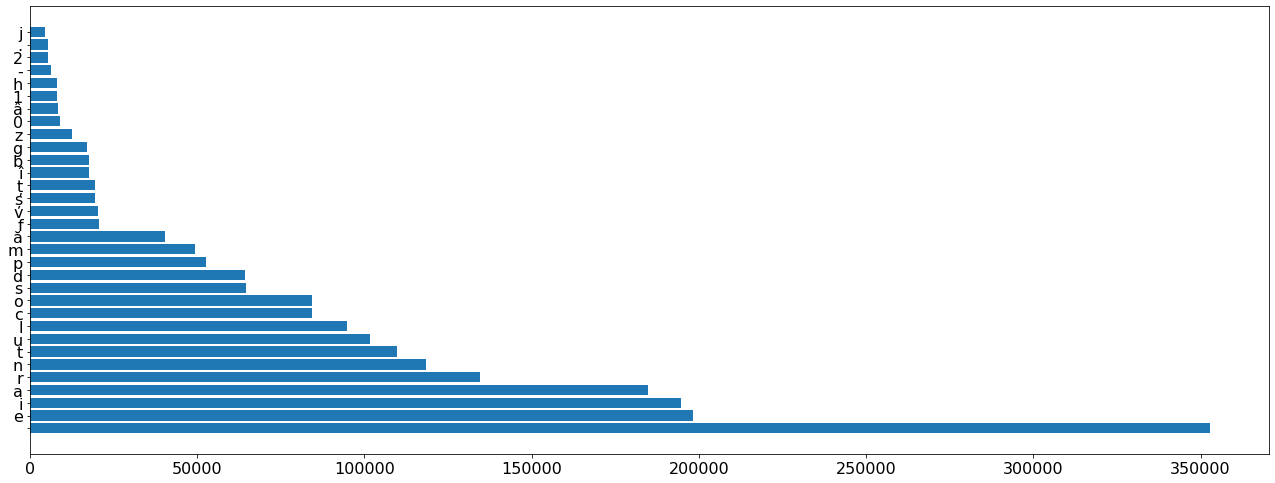

In [ ]:
# ploting a chart with the most used characters
alphabet_pairs = char_count_pairs[:alphabet_size]
alphabet_chars, alphabet_counts = zip(*alphabet_pairs)

plt.figure(figsize=(18, 7))
plt.barh(alphabet_chars, alphabet_counts)
plt.tight_layout()

In [ ]:
# Create alphabet_map
alphabet_map = {char: idx + 2 for idx, char in enumerate(characters)}
alphabet_map['<unk>'] = 0

# Sliding window

After obtaining the alphabet map, a sliding window will extract the sequence and the labels, in the following way. Let's took a small example:

 - text: "Comisia națională pentru informatică și libertăți CNIL precum și 19 omologi ai acesteia în SUA Germania Australia Marea Britanie"
 - window_size = 10

| Sliding window                  | Label |
|:-------------------------------:|:-----:|
| [c, o, m, i, s, i, a,  , n, a]  |   1   |
| [o, m, i, s, i, a,  , n, a, ț]  |   0   |
| [m, i, s, i, a,  , n, a, ț, i]  |   0   |
| [i, s, i, a,  , n, a, ț, i, o]  |   0   |
| … | … |
| [m, a, r, e, a,  , b, r, i, t]  |   1   |
| [a, r, e, a,  , b, r, i, t, a]  |   0   |
| [r, e, a,  , b, r, i, t, a, n]  |   0   |
| [e, a,  , b, r, i, t, a, n, i]  |   0   |
| [a,  , b, r, i, t, a, n, i, e]  |   0   |

Additionaly, the characters are encoded as integers with `alphabet_map` previously computed.

In [ ]:
# Remap lowercased input characters using the alphabet_map
letter_ids = np.zeros(text_size, np.int16)
for i in trange(text_size):
    char = complete_text[i].lower()
    # default unknown id
    letter_ids[i] = alphabet_map.get(char, 0)

# Generate input batches
windows = np.zeros([text_size, window_size], np.int16)
labels = np.zeros(text_size, np.uint8)

full_data = []
for i in trange(text_size - window_size):
    windows[i] = letter_ids[i: i + window_size]
    labels[i] = complete_text[i].isupper()
    full_data.append({
        "windows": windows,
        "labels": labels
    })

len(full_data)

100%|██████████| 2163981/2163981 [00:05<00:00, 407906.91it/s]


2163981

In [ ]:
# Don't forget about spliting into train and validation
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
class UppercaseDataset(torch.utils.data.Dataset):
    def __init__(self, ):
        super().__init__()

    # the following two methods must be implemented
    def __getitem__(self, k):
        """Returns the k-th element of the dataset""""
        pass

    def __len__(self):
        """Return the length of the dataset"""
        pass

In [ ]:
class UppercaseModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Our recommendation:
        # 1. Character Embeddings / One Hot Encoder
        # 2. Sequence of Linear layers
        # 3. Flatten Layer
        # 4. Sequence of Linear layers

        # for 1, you can use either word embeddings
        # https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html
        # either one hot encoders
        # https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html

    def forward(self, x):
        pass